<font color=green><p style="font-size:32px;text-align:center"><b>Social Network Graph Link Prediction - Facebook Challenge</b></p></font>

<font color=blue><h3>Problem Statement:</h3></font>

Given a directed social graph, have to predict missing links to recommend users (Link Prediction in graph)

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

import pickle
import networkx as nx

<font color=gren><h4>Reading Data</h4></font>

In [3]:
traincsv = pd.read_csv("My Work/train.csv")

In [4]:
traincsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB


In [5]:
#check null values
print(traincsv[traincsv.isnull().any(1)])

Empty DataFrame
Columns: [source_node, destination_node]
Index: []


In [6]:
#check duplicate entries
print(sum(traincsv.duplicated()))

0


In [7]:
traincsv.head()

,source_node,destination_node
0,1,690569
1,1,315892
2,1,189226
3,2,834328
4,2,1615927


In [8]:
#save this train.csv file without header and index
traincsv.to_csv("My Work/train_wo_header.csv", header=False, index=False)

In [9]:
g = nx.read_edgelist("My Work/train_wo_header.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)

In [10]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


<font color=gren><h4>Display Subgraph</h4></font>

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


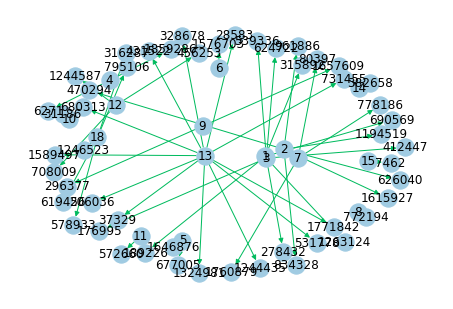

In [11]:
if not os.path.isfile('My Work/subgraph_sample.csv'):
    pd.read_csv("My Work/train.csv", nrows=50).to_csv("My Work/subgraph_sample.csv", header=False, index=False)

subgraph = nx.read_edgelist("My Work/subgraph_sample.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color='#A0CBE2', edge_color='#00bb5e', width=1, edge_cmap=plt.cm.Blues, with_labels=True)
print(nx.info(subgraph))

<font color=blue><h3>Exploratory Data Analysis</h3></font>

In [12]:
#number of unique persons
print("NUMBER OF UNIQUE PERSONS -",len(g.nodes()))

NUMBER OF UNIQUE PERSONS - 1862220


<font color=gren><h4>Number of Followers</h4></font>

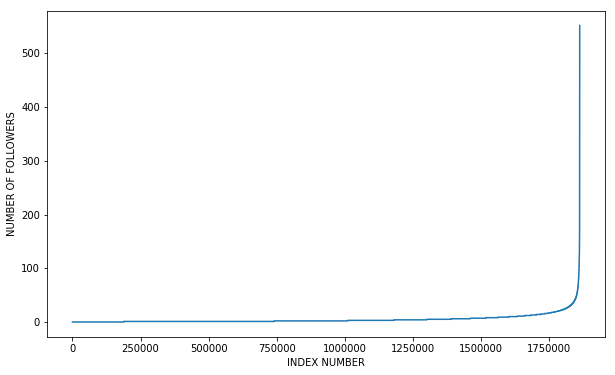

In [13]:
#number of followers of each person
indegree_dist = list(dict(g.in_degree()).values())
indegree_dist.sort()

plt.figure(figsize=(10,6))
plt.plot(indegree_dist)

plt.xlabel("INDEX NUMBER")
plt.ylabel("NUMBER OF FOLLOWERS")
plt.show()

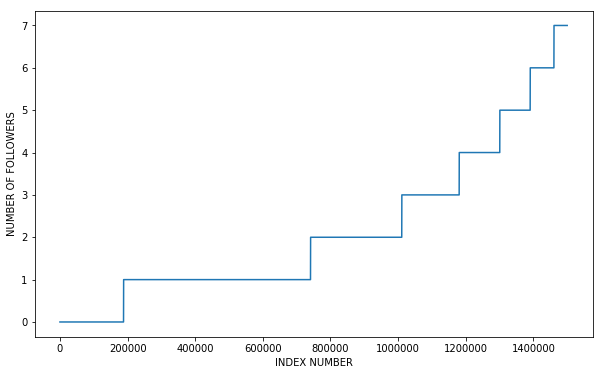

In [14]:
#lets zoom in
plt.figure(figsize=(10,6))
plt.plot(indegree_dist[0:1500000])

plt.xlabel("INDEX NUMBER")
plt.ylabel("NUMBER OF FOLLOWERS")
plt.show()

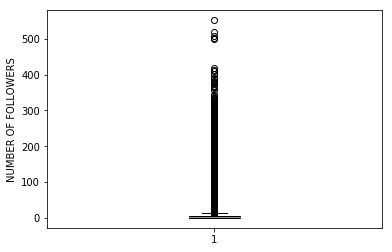

In [15]:
#boxplot
plt.boxplot(indegree_dist)
plt.ylabel("NUMBER OF FOLLOWERS")
plt.show()

In [16]:
#90 to 100 percentile
for i in range(91,101):
    print(i,"PERCENTILE VALUE -",np.percentile(indegree_dist,i))

91 PERCENTILE VALUE - 13.0
92 PERCENTILE VALUE - 14.0
93 PERCENTILE VALUE - 15.0
94 PERCENTILE VALUE - 17.0
95 PERCENTILE VALUE - 19.0
96 PERCENTILE VALUE - 21.0
97 PERCENTILE VALUE - 24.0
98 PERCENTILE VALUE - 29.0
99 PERCENTILE VALUE - 40.0
100 PERCENTILE VALUE - 552.0


99% of data having 40 followers only.

In [17]:
#99 to 100 percentile
for i in range(1,11):
    print(99+(i/10),"PERCENTILE VALUE -",np.percentile(indegree_dist,99+(i/10)))

99.1 PERCENTILE VALUE - 42.0
99.2 PERCENTILE VALUE - 44.0
99.3 PERCENTILE VALUE - 47.0
99.4 PERCENTILE VALUE - 50.0
99.5 PERCENTILE VALUE - 55.0
99.6 PERCENTILE VALUE - 61.0
99.7 PERCENTILE VALUE - 70.0
99.8 PERCENTILE VALUE - 84.0
99.9 PERCENTILE VALUE - 112.0
100.0 PERCENTILE VALUE - 552.0


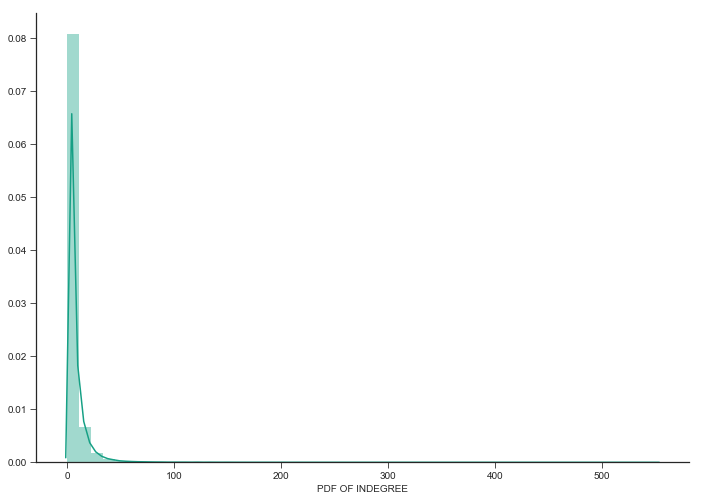

In [18]:
%matplotlib inline
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree_dist, color='#16A085')
plt.xlabel('PDF OF INDEGREE')
sns.despine()

#plt.show()

<font color=gren><h4>Number of Following</h4></font>

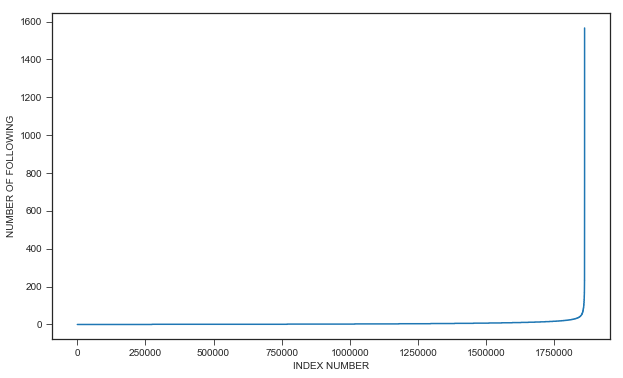

In [19]:
#number of following of each person

outdegree_dist = list(dict(g.out_degree()).values())
outdegree_dist.sort()

plt.figure(figsize=(10,6))
plt.plot(outdegree_dist)

plt.xlabel("INDEX NUMBER")
plt.ylabel("NUMBER OF FOLLOWING")
plt.show()

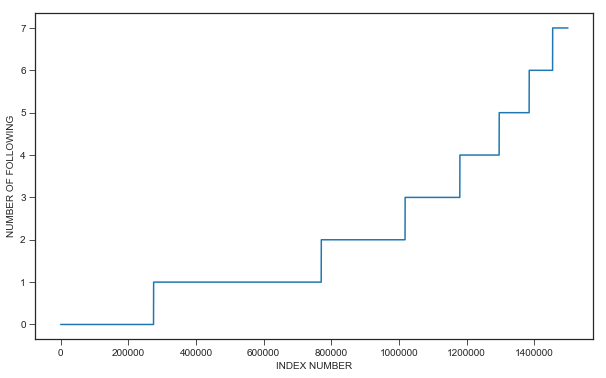

In [20]:
#lets zoom in
plt.figure(figsize=(10,6))
plt.plot(outdegree_dist[0:1500000])

plt.xlabel("INDEX NUMBER")
plt.ylabel("NUMBER OF FOLLOWING")
plt.show()

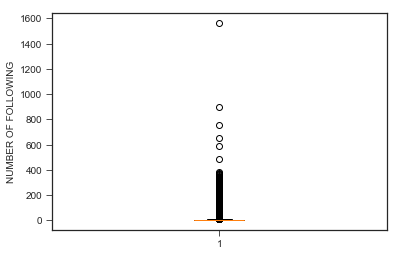

In [21]:
#boxplot
plt.boxplot(outdegree_dist)
plt.ylabel("NUMBER OF FOLLOWING")
plt.show()

In [22]:
#90 to 100 percentile
for i in range(91,101):
    print(i,"PERCENTILE VALUE -",np.percentile(outdegree_dist,i))

91 PERCENTILE VALUE - 13.0
92 PERCENTILE VALUE - 14.0
93 PERCENTILE VALUE - 15.0
94 PERCENTILE VALUE - 17.0
95 PERCENTILE VALUE - 19.0
96 PERCENTILE VALUE - 21.0
97 PERCENTILE VALUE - 24.0
98 PERCENTILE VALUE - 29.0
99 PERCENTILE VALUE - 40.0
100 PERCENTILE VALUE - 1566.0


In [23]:
#99 to 100 percentile
for i in range(1,11):
    print(99+(i/10),"PERCENTILE VALUE -",np.percentile(outdegree_dist,99+(i/10)))

99.1 PERCENTILE VALUE - 42.0
99.2 PERCENTILE VALUE - 45.0
99.3 PERCENTILE VALUE - 48.0
99.4 PERCENTILE VALUE - 52.0
99.5 PERCENTILE VALUE - 56.0
99.6 PERCENTILE VALUE - 63.0
99.7 PERCENTILE VALUE - 73.0
99.8 PERCENTILE VALUE - 90.0
99.9 PERCENTILE VALUE - 123.0
100.0 PERCENTILE VALUE - 1566.0


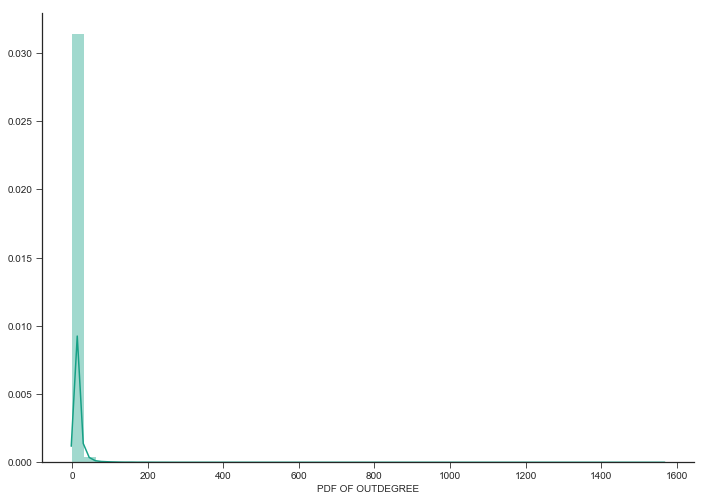

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree_dist, color='#16A085')
plt.xlabel('PDF OF OUTDEGREE')
sns.despine()

#plt.show()

In [25]:
not_following = sum(np.array(outdegree_dist)==0)
per_not_following = (not_following*100)/len(outdegree_dist)

print("NUMBER OF PERSONS THOSE ARE NOT FOLLOWING ANYONE - {} AND % IS {}".format(not_following, round(per_not_following,2)))

NUMBER OF PERSONS THOSE ARE NOT FOLLOWING ANYONE - 274512 AND % IS 14.74


In [26]:
zero_follower = sum(np.array(indegree_dist)==0)
per_zero_follower = (zero_follower*100)/len(indegree_dist)

print("NUMBER OF PERSONS HAVING ZERO FOLLOWERS ARE {} AND % IS {}".format(zero_follower, round(per_zero_follower,2)))

NUMBER OF PERSONS HAVING ZERO FOLLOWERS ARE 188043 AND % IS 10.1


In [27]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0:
        if len(list(g.successors(i)))==0:
            count+=1
            
print("NUMBER OF PERSONS THOSE ARE NOT FOLLOWING ANYONE AND ALSO NOT HAVING ANY FOLLOWERS ARE",count)

NUMBER OF PERSONS THOSE ARE NOT FOLLOWING ANYONE AND ALSO NOT HAVING ANY FOLLOWERS ARE 0


<font color=gren><h4>Number of Followers + Number of Following</h4></font>

In [28]:
from collections import Counter
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())

d = Counter(dict_in) + Counter(dict_out)
in_out_degree = np.array(list(d.values()))

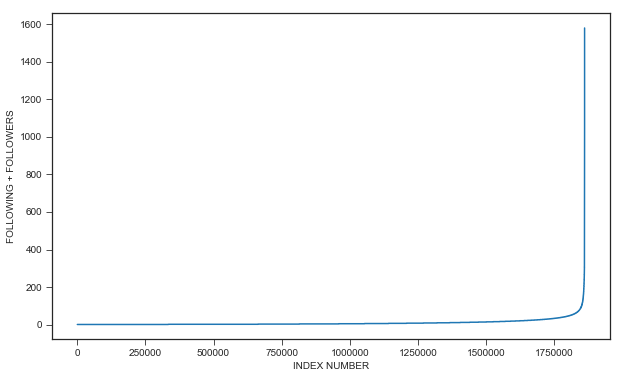

In [29]:
in_out_degree_sort = sorted(in_out_degree)

plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort)

plt.xlabel("INDEX NUMBER")
plt.ylabel("FOLLOWING + FOLLOWERS")
plt.show()

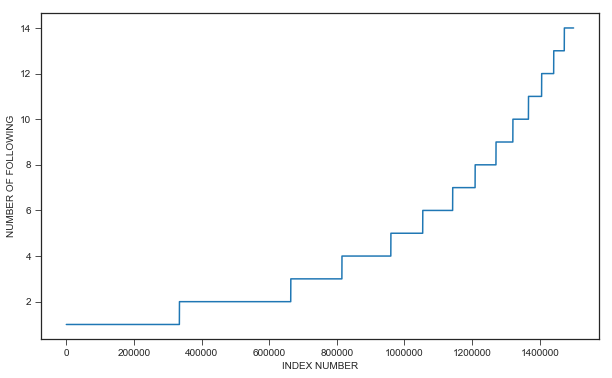

In [30]:
#lets zoom in
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])

plt.xlabel("INDEX NUMBER")
plt.ylabel("NUMBER OF FOLLOWING")
plt.show()

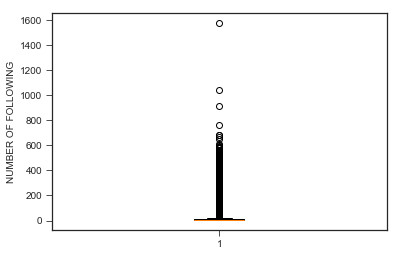

In [31]:
#boxplot
plt.boxplot(in_out_degree_sort)
plt.ylabel("NUMBER OF FOLLOWING")
plt.show()

In [32]:
#90 to 100 percentile
for i in range(91,101):
    print(i,"PERCENTILE VALUE -",np.percentile(in_out_degree_sort,i))

91 PERCENTILE VALUE - 26.0
92 PERCENTILE VALUE - 28.0
93 PERCENTILE VALUE - 31.0
94 PERCENTILE VALUE - 33.0
95 PERCENTILE VALUE - 37.0
96 PERCENTILE VALUE - 41.0
97 PERCENTILE VALUE - 48.0
98 PERCENTILE VALUE - 58.0
99 PERCENTILE VALUE - 79.0
100 PERCENTILE VALUE - 1579.0


In [33]:
#99 to 100 percentile
for i in range(1,11):
    print(99+(i/10),"PERCENTILE VALUE -",np.percentile(in_out_degree_sort,99+(i/10)))

99.1 PERCENTILE VALUE - 83.0
99.2 PERCENTILE VALUE - 87.0
99.3 PERCENTILE VALUE - 93.0
99.4 PERCENTILE VALUE - 99.0
99.5 PERCENTILE VALUE - 108.0
99.6 PERCENTILE VALUE - 120.0
99.7 PERCENTILE VALUE - 138.0
99.8 PERCENTILE VALUE - 168.0
99.9 PERCENTILE VALUE - 221.0
100.0 PERCENTILE VALUE - 1579.0


In [34]:
print("MINIMUM NUMBER OF FOLLOWING + FOLLOWERS -",min(in_out_degree))
print("-"*100)
print(sum(in_out_degree==in_out_degree.min()),"HAVING MINIMUM NUMBER OF FOLLOWING + FOLLOWERS")

MINIMUM NUMBER OF FOLLOWING + FOLLOWERS - 1
----------------------------------------------------------------------------------------------------
334291 HAVING MINIMUM NUMBER OF FOLLOWING + FOLLOWERS


In [35]:
print("MAXIMUM NUMBER OF FOLLOWING + FOLLOWERS -",max(in_out_degree))
print("-"*100)
print(sum(in_out_degree==in_out_degree.max()),"HAVING MAXIMUM NUMBER OF FOLLOWING + FOLLOWERS")

MAXIMUM NUMBER OF FOLLOWING + FOLLOWERS - 1579
----------------------------------------------------------------------------------------------------
1 HAVING MAXIMUM NUMBER OF FOLLOWING + FOLLOWERS


In [36]:
print(sum(in_out_degree<10),"PERSONS HAVING NUMBER OF FOLLOWING + FOLLOWERS LESS THAN 10")

1320326 PERSONS HAVING NUMBER OF FOLLOWING + FOLLOWERS LESS THAN 10


In [37]:
print("NUMBER OF WEAKLY CONNECTED COMPONENTS -",len(list(nx.weakly_connected_components(g))))

count = 0
for i in list(nx.weakly_connected_components(g)):
    if len(i)==2:
        count+=1
print("NUMBER OF WEAKLY CONNECTED COMPONENTS WITH 2 NODES -",count)

NUMBER OF WEAKLY CONNECTED COMPONENTS - 45558
NUMBER OF WEAKLY CONNECTED COMPONENTS WITH 2 NODES - 32195


<font color=blue><h3>Posing a Problem as a Classification Problem</h3></font>

**<font color=black>Generating some edges which are not present in graph for supervised learning.</font>**

- Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.

In [38]:
import os
import csv
import random
#generating bad edges from given graph
if not os.path.isfile("My Work/after_eda/missing_edges_final.p"):
    #getting all set of edges
    r = csv.reader(open("My Work/train_wo_header.csv", 'r'))
    edges = dict()

    for edge in r:
        edges[(edge[0], edge[1])] = 1

    missing_edges = set([])
    while(len(missing_edges) < 9437519):
        a = random.randint(1, 1862220)
        b = random.randint(1, 1862220)
        temp = edges.get((a,b),-1)
    
        if temp==-1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2:
                    missing_edges.add((a,b))
                else:
                    continue
            except:
                missing_edges.add((a,b))
        else:
            pickle.dump(missing_edges, open("My Work/after_eda/missing_edges_final.p", 'wb'))
else:
    missing_edges = pickle.load(open("My Work/after_eda/missing_edges_final.p",'rb'))

In [40]:
len(missing_edges)

9437519

<font color=gren><h4>Train and Test Data Split</h4></font>

In [41]:
from sklearn.model_selection import train_test_split

if (not os.path.isfile('My Work/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('My Work/after_eda/test_pos_after_eda.csv')):
    #reading_total_data
    data_pos = pd.read_csv("My Work/train.csv")
    data_neg = pd.DataFrame(list(missing_edges), columns=['source_node', 'destination_node'])
    
    print("NUMBER OF NODES IN THE GRAPH WITH EDGES -",data_pos.shape[0])
    print("NUMBER OF NODES IN THE GRAPH WITHOUT EDGES -",data_neg.shape[0])
    
    #train_test_split_(_80_:_20_)
    #positive links and negative links seperatly because we need positive training data only for creating graph
    #and for feature generation
    X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(data_pos, np.ones(len(data_pos)), test_size=0.2, random_state=9)
    X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(data_neg, np.zeros(len(data_neg)), test_size=0.2, random_state=9)
    
    print("-"*100)
    print("NUMBER OF NODES IN TRAIN DATA GRAPH WITH EDGES -",X_train_pos.shape[0])
    print("NUMBER OF NODES IN TRAIN DATA GRAPH WITHOUT EDGES -",X_train_neg.shape[0])
    print("-"*100)
    print("NUMBER OF NODES IN TEST DATA GRAPH WITH EDGES -",X_test_pos.shape[0])
    print("NUMBER OF NODES IN TEST DATA GRAPH WITHOUT EDGES -",X_test_neg.shape[0])

    #removing header and saving
    X_train_pos.to_csv('My Work/after_eda/train_pos_after_eda.csv', header=False, index=False)
    X_train_neg.to_csv('My Work/after_eda/train_neg_after_eda.csv', header=False, index=False)
    X_test_pos.to_csv('My Work/after_eda/test_pos_after_eda.csv', header=False, index=False)
    X_test_neg.to_csv('My Work/after_eda/test_neg_after_eda.csv', header=False, index=False)
else:
    del missing_edges

NUMBER OF NODES IN THE GRAPH WITH EDGES - 9437519
NUMBER OF NODES IN THE GRAPH WITHOUT EDGES - 9437519
----------------------------------------------------------------------------------------------------
NUMBER OF NODES IN TRAIN DATA GRAPH WITH EDGES - 7550015
NUMBER OF NODES IN TRAIN DATA GRAPH WITHOUT EDGES - 7550015
----------------------------------------------------------------------------------------------------
NUMBER OF NODES IN TEST DATA GRAPH WITH EDGES - 1887504
NUMBER OF NODES IN TEST DATA GRAPH WITHOUT EDGES - 1887504


In [43]:
if (not os.path.isfile('My Work/after_eda/train_pos_after_eda.csv')) and (not os.path.isfile('My Work/after_eda/test_pos_after_eda.csv')):
    train_graph = nx.read_edgelist("D:/Applied_Ai/Case Studies/Facebook/My Work/after_eda/train_pos_after_eda.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)
    test_graph = nx.read_edgelist("D:/Applied_Ai/Case Studies/Facebook/My Work/after_eda/test_pos_after_eda.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)

    print(nx.info(train_graph))
    print(nx.info(test_graph))

    #finding the unique nodes in the both train and test graphs
    train_node_pos = set(train_graph.nodes())
    test_node_pos = set(test_graph.nodes())

    common_tr_te = len(train_node_pos.intersection(test_node_pos)) #common_in_train_and_test
    trY_teN = len(train_node_pos - test_node_pos) #present in train, but not in test
    trN_teY = len(test_node_pos - train_node_pos) #present in test, but not in train

    print("NUMBER OF COMMON PEOPLE IN TRAIN AND TEST -",common_tr_te)
    print("NUMBER OF PEOPLE PRESENT IN TRAIN BUT NOT PRESENT IN TEST -",trY_teN)
    print("NUMBER OF PEOPLE PRESENT IN TEST BUT NOT PRESENT IN TRAIN -",trN_teY)
    print("-"*100)

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399
Name: 
Type: DiGraph
Number of nodes: 1144623
Number of edges: 1887504
Average in degree:   1.6490
Average out degree:   1.6490
NUMBER OF COMMON PEOPLE IN TRAIN AND TEST - 1063125
NUMBER OF PEOPLE PRESENT IN TRAIN BUT NOT PRESENT IN TEST - 717597
NUMBER OF PEOPLE PRESENT IN TEST BUT NOT PRESENT IN TRAIN - 81498
----------------------------------------------------------------------------------------------------


In [47]:
print("{}% PEOPLE ARE NOT THERE IN TRAIN BUT EXIST IN TEST DATA".format(round((trN_teY*100)/len(test_node_pos),2)))

7.12% PEOPLE ARE NOT THERE IN TRAIN BUT EXIST IN TEST DATA


<font color=red>We have a cold start problem here.</font>

In [51]:
#final train and test dataset
if (not os.path.isfile('My Work/after_eda/train_after_eda.csv')) and \
(not os.path.isfile('My Work/after_eda/test_after_eda.csv')) and \
(not os.path.isfile('My Work/train_y.csv')) and \
(not os.path.isfile('My Work/test_y.csv')) and \
(os.path.isfile('My Work/after_eda/train_pos_after_eda.csv')) and \
(os.path.isfile('My Work/after_eda/test_pos_after_eda.csv')) and \
(os.path.isfile('My Work/after_eda/train_neg_after_eda.csv')) and \
(os.path.isfile('My Work/after_eda/test_neg_after_eda.csv')):
    
    X_train_pos = pd.read_csv("My Work/after_eda/train_pos_after_eda.csv", names=['source_node', 'destination_node'])
    X_test_pos = pd.read_csv("My Work/after_eda/test_pos_after_eda.csv", names=['source_node', 'destination_node'])
    X_train_neg = pd.read_csv("My Work/after_eda/train_neg_after_eda.csv", names=['source_node', 'destination_node'])
    X_test_neg = pd.read_csv("My Work/after_eda/test_neg_after_eda.csv", names=['source_node', 'destination_node'])

    print("-.-."*20)
    print("NUMBER OF NODES IN TRAIN DATA GRAPH WITH EDGES -",X_train_pos.shape[0])
    print("NUMBER OF NODES IN TRAIN DATA GRAPH WITHOUT EDGES -",X_train_neg.shape[0])
    print("-.-."*20)
    print("NUMBER OF NODES IN TEST DATA GRAPH WITH EDGES -",X_test_pos.shape[0])
    print("NUMBER OF NODES IN TEST DATA GRAPH WITHOUT EDGES -",X_test_neg.shape[0])

    X_train = X_train_pos.append(X_train_neg, ignore_index=True)
    y_train = np.concatenate((y_train_pos, y_train_neg))

    X_test = X_test_pos.append(X_test_neg, ignore_index=True)
    y_test = np.concatenate((y_test_pos, y_test_neg))
    #------
    X_train.to_csv("My Work/after_eda/train_after_eda.csv", header=False, index=False)
    X_test.to_csv("My Work/after_eda/test_after_eda.csv", header=False, index=False)

    pd.DataFrame(y_train.astype(int)).to_csv("My Work/train_y.csv", header=False, index=False)
    pd.DataFrame(y_test.astype(int)).to_csv("My Work/test_y.csv", header=False, index=False)

-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
NUMBER OF NODES IN TRAIN DATA GRAPH WITH EDGES - 7550015
NUMBER OF NODES IN TRAIN DATA GRAPH WITHOUT EDGES - 7550015
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
NUMBER OF NODES IN TEST DATA GRAPH WITH EDGES - 1887504
NUMBER OF NODES IN TEST DATA GRAPH WITHOUT EDGES - 1887504


In [54]:
print("DATA POINTS IN TRAIN DATA -",X_train.shape)
print("DATA POINTS IN TEST DATA -",X_test.shape)
print("-.-."*20)
print("SHAPE OF TARGET VARIABLE IN TRAIN -",y_train.shape)
print("SHAPE OF TARGET VARIABLE IN TEST -",y_test.shape)

DATA POINTS IN TRAIN DATA - (15100030, 2)
DATA POINTS IN TEST DATA - (3775008, 2)
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
SHAPE OF TARGET VARIABLE IN TRAIN - (15100030,)
SHAPE OF TARGET VARIABLE IN TEST - (3775008,)
